## **1. Business Understanding**

### 1.1 Project Objective

The core objective of this project is to develop an object detection model capable of identifying **potholes** in road surface images. Potholes are a major cause of road accidents, vehicle damage, and increased maintenance costs. Manual detection is time-consuming, expensive, and prone to human error. Automating this process can assist in real-time monitoring and proactive maintenance by government bodies, transportation authorities, and autonomous vehicle systems.

### 1.2 Business Use Case

- **Government/Municipalities**: Integrate into road inspection workflows for automated reporting and mapping of potholes.
- **Logistics/Delivery Firms**: Optimize vehicle routing by identifying poor road conditions in advance.
- **Autonomous Vehicles**: Real-time pothole detection enhances driving safety and decision-making systems.

### 1.3 Success Criteria

To consider this project a success, the system must:
- Accurately detect potholes in various conditions (day/night, dry/wet roads).
- Maintain high precision and recall to minimize false positives/negatives.
- Generalize to new roads not seen during training.
- Be deployable on edge devices or integrated into existing systems (e.g., dashboard cameras, drones).

### 1.4 Constraints and Assumptions

- The dataset is assumed to be representative of real-world conditions.
- Potholes are the only class being detected.
- Images are mostly taken from a fixed angle and height (e.g., dashcam or aerial).
- Labeling quality is consistent across the dataset.


## **2. Data Understanding**

### 2.1 Data Collection Source

The dataset used for this project consists of road images annotated with bounding boxes indicating the location of potholes. The images can come from sources such as:
- Dashcam recordings
- Drone or aerial footage
- Surveillance cameras

For this study, we use a pre-labeled dataset formatted for YOLO training.

### 2.2 Data Structure

The dataset follows the YOLO convention:
- Each image (e.g., `abc123.jpg`) has a corresponding label file (`abc123.txt`).
- The `.txt` label contains one row per object:
class_id center_x center_y width height

All coordinates are normalized between 0 and 1.

The dataset directory is structured as follows:

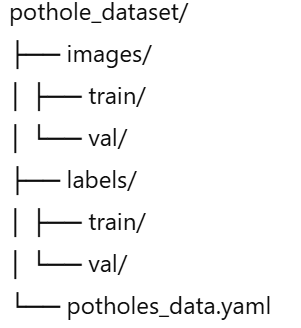


### 2.3 Data Summary

| Attribute     | Details                      |
|---------------|-------------------------------|
| Image Format  | JPEG (`.jpg`)                |
| Label Format  | YOLO text format (`.txt`)    |
| Number of Classes | 1 (`pothole`)              |
| Annotation Tool | Possibly LabelImg or Roboflow |
| Total Samples | [Add number once loaded]     |

### 2.4 Sample Exploration

We randomly sample a few images and labels to verify annotation quality and diversity of conditions (lighting, background, pothole shapes).

We also analyze:
- Distribution of image resolutions
- Frequency of pothole per image
- Class balance (only one class, so focus on object counts)

### 2.5 Potential Data Issues

- Inconsistent labeling (bounding boxes not centered on pothole)
- Variation in image brightness/contrast
- Imbalanced dataset (some images may not have potholes)
- Duplicate or near-duplicate images







## 3. Data Preparation

### 3.1 Objective

To prepare the data in a form that is directly usable for training a YOLOv8 object detection model. This involves organizing the dataset, checking label validity, and setting up the configuration file (`potholes_data.yaml`).

### 3.2 Label and Image Alignment

Every image must have a corresponding label file with the exact same name (except for the extension). The model will ignore images without labels, which could lead to loss of data.

### 3.3 Directory Setup

The following folder structure is established:



3.4 Configuration File (potholes_data.yaml)
A YAML file is required to tell YOLO where the images and labels are, how many classes exist, and what those classes a


## **Step 01 Install the required Packages**

In [1]:
##install YOLOv12 directly from from github

!pip install git+https://github.com/sunsmarterjie/yolov12.git


  Cloning https://github.com/sunsmarterjie/yolov12.git to /tmp/pip-req-build-vafft5qa
  Running command git clone --filter=blob:none --quiet https://github.com/sunsmarterjie/yolov12.git /tmp/pip-req-build-vafft5qa
  Resolved https://github.com/sunsmarterjie/yolov12.git to commit 3bca22b336e96cfdabfec4c062b84eef210e9563
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install flash-attn --no-build-isolation


## **Step 02 Import all the Required Libraries**

In [3]:
import os
import ultralytics
ultralytics.checks()

Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

## **Step #03 Download Dataset from Roboflow**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nQa6aqpKmYdjy8vuDgwn")
project = rf.workspace("muhammadmoin-arxtl").project("potholes-detection-jbnou")
version = project.version(1)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...


In [6]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [7]:
!ls /content/Potholes-Detection-1/train/images | head
!ls /content/Potholes-Detection-1/valid | head
!ls /content/Potholes-Detection-1/test | head


img-100_jpg.rf.3c947de9a699c8f0d0752425c53b8cfd.jpg
img-101_jpg.rf.106865a06b81725496ed9a62cea28718.jpg
img-102_jpg.rf.f8f73e0042bcf51f0f865306354b2312.jpg
img-103_jpg.rf.05f3a0e9ae7e4ab3723d0b13c1c06eed.jpg
img-104_jpg.rf.b9a53f270f4d535ea0ea9109a46391a6.jpg
img-105_jpg.rf.a39d023e0fad933df175c9fed71e0b60.jpg
img-106_jpg.rf.c6b1c6f92f36385e688227b8633e0a34.jpg
img-107_jpg.rf.1f6c80b9a5c33a29cf5729c71036ceea.jpg
img-109_jpg.rf.7d73ff26c5bae6de4a0f60bf72341584.jpg
img-10_jpg.rf.82d121edb6422c9cfa7a38752b8b875f.jpg
images
labels
labels.cache
images
labels


## **Step #04 Fine-tune YOLOv12 model on a Custom Dataset**

In [8]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [9]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['0']

roboflow:
test: ../test/images
train: ../train/images
val: ../valid/images


In [10]:
model = YOLO('yolov12m.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=50)

New https://pypi.org/project/ultralytics/8.3.214 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12m.yaml, data=/content/Potholes-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

train: Scanning /content/Potholes-Detection-1/train/labels.cache... 465 images, 0 backgrounds, 0 corrupt: 100%|██████████| 465/465 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Potholes-Detection-1/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 131 weight(decay=0.0), 138 weight(decay=0.0005), 137 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      13.5G      3.661      3.971      4.229          1        640: 100%|██████████| 30/30 [00:46<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:10<00:00,  2.17s/it]

                   all        133        299    0.00198      0.264    0.00156   0.000538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      12.8G      3.483      3.718      4.032          4        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        133        299    0.00188      0.251     0.0016   0.000531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      12.8G      3.222      3.486      3.641          6        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        133        299    0.00279      0.194    0.00282   0.000768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.8G      3.007       3.29      3.383          3        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        133        299       0.03     0.0334    0.00633    0.00162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      12.8G      2.908      3.234       3.21          1        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]

                   all        133        299     0.0571       0.14     0.0186    0.00408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      12.8G      2.892      3.056      3.113          9        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

                   all        133        299     0.0796      0.124     0.0393    0.00897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.1G      2.748      3.033      3.042          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        133        299     0.0723      0.114      0.044     0.0135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      12.8G      2.695      2.923      2.941          2        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        133        299     0.0854      0.167     0.0503     0.0153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      12.8G      2.624      2.938      2.921          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        133        299      0.151      0.204     0.0998      0.031



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.8G      2.594       2.81      2.852          5        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        133        299      0.168      0.167     0.0829     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.1G      2.495      2.796      2.828          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        133        299      0.161      0.235      0.095     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      12.8G      2.543      2.764      2.764          1        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


                   all        133        299      0.171      0.227      0.126      0.043

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      12.8G       2.45      2.648       2.75          6        640: 100%|██████████| 30/30 [00:26<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.179      0.281      0.125      0.042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      12.8G       2.52      2.666      2.769          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        133        299      0.196      0.281       0.15     0.0467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.1G      2.351      2.551      2.615          3        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        133        299      0.154      0.177        0.1     0.0308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      12.8G      2.292      2.527      2.581          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


                   all        133        299      0.297      0.318      0.199      0.077

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      12.8G      2.265      2.436       2.53          6        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.343      0.291      0.264      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      12.8G      2.337      2.502      2.578          1        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.72it/s]

                   all        133        299      0.341      0.281      0.226     0.0781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.1G      2.193      2.408      2.504          2        640: 100%|██████████| 30/30 [00:26<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        133        299      0.237      0.318      0.209     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      12.8G      2.201      2.364      2.463          5        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        133        299      0.346      0.398       0.31      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      12.8G      2.155      2.284      2.422          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299       0.38      0.261      0.255        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      12.8G      2.155      2.266      2.418         11        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        133        299      0.384      0.395      0.338      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.1G      2.087      2.214      2.372          3        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299       0.31      0.367      0.302      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      12.8G      2.065      2.236      2.384          3        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        133        299      0.393      0.351      0.313      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      12.8G      2.038      2.141      2.311          3        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.372      0.368       0.32      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.8G      2.018      2.162      2.316          4        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.483      0.391      0.385      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      12.8G      1.991      2.051      2.282          4        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        133        299       0.47      0.421      0.399      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      12.8G      1.963      2.074      2.262          2        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        133        299      0.417      0.468      0.392      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      12.8G      1.993      2.055      2.268          2        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        133        299      0.493      0.418      0.421      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      12.8G      1.963      1.994      2.213          9        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        133        299      0.543      0.385      0.438      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.1G      1.911      1.997      2.196          6        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        133        299        0.4      0.398      0.357      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      12.8G      1.903      1.964      2.191          1        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.539      0.435      0.451      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.1G      1.819       2.01      2.054          0        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        133        299      0.469      0.462      0.436      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.8G      1.858      1.819      2.117          3        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        133        299       0.43      0.465      0.447      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.1G      1.869      1.863      2.071          4        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.577      0.437      0.505      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      12.8G      1.842      1.829       2.13          3        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        133        299      0.426      0.431      0.408      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.1G      1.844      1.853      2.108          4        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        133        299      0.531      0.482      0.491      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      12.8G      1.783      1.766      2.064          3        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        133        299       0.53      0.485      0.501      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      12.8G      1.739      1.789      2.031          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.534      0.514       0.54      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.8G      1.726      1.753      2.047          3        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.538      0.495       0.51      0.266


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.1G      1.691      1.796      2.038          3        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        133        299      0.555      0.535      0.563      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      12.8G       1.66      1.676       2.01          3        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        133        299      0.585       0.58      0.607      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      12.8G      1.626       1.65      1.962          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        133        299      0.569      0.562      0.584      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      12.8G      1.664      1.633      2.005          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.651      0.538      0.623      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.1G      1.608        1.6      1.943          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        133        299       0.71      0.548      0.632       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      12.8G      1.604      1.645      1.976          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        133        299      0.657      0.565      0.651      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      12.8G      1.633       1.58       1.97          1        640: 100%|██████████| 30/30 [00:26<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        133        299      0.613      0.595      0.644      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      12.8G      1.617      1.538      1.991          3        640: 100%|██████████| 30/30 [00:26<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        133        299      0.702      0.574      0.661      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.1G       1.58      1.517       1.93          4        640: 100%|██████████| 30/30 [00:26<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]

                   all        133        299      0.681      0.579      0.661       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      12.8G      1.566      1.496      1.922          1        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        133        299      0.666      0.605      0.669      0.367



50 epochs completed in 0.460 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 39.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 39.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 402 layers, 19,577,299 parameters, 0 gradients, 59.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


                   all        133        299      0.681      0.585      0.661      0.369
Speed: 0.2ms preprocess, 16.8ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train2


## **Step # 05 Evaluate fine-tuned YOLOv12 model**

In [13]:
HOME = "/content"
!ls {HOME}/runs/detect/train2


args.yaml					    train_batch1200.jpg
confusion_matrix_normalized.png			    train_batch1201.jpg
confusion_matrix.png				    train_batch1202.jpg
events.out.tfevents.1760588166.d7f9ae62ab7b.2267.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


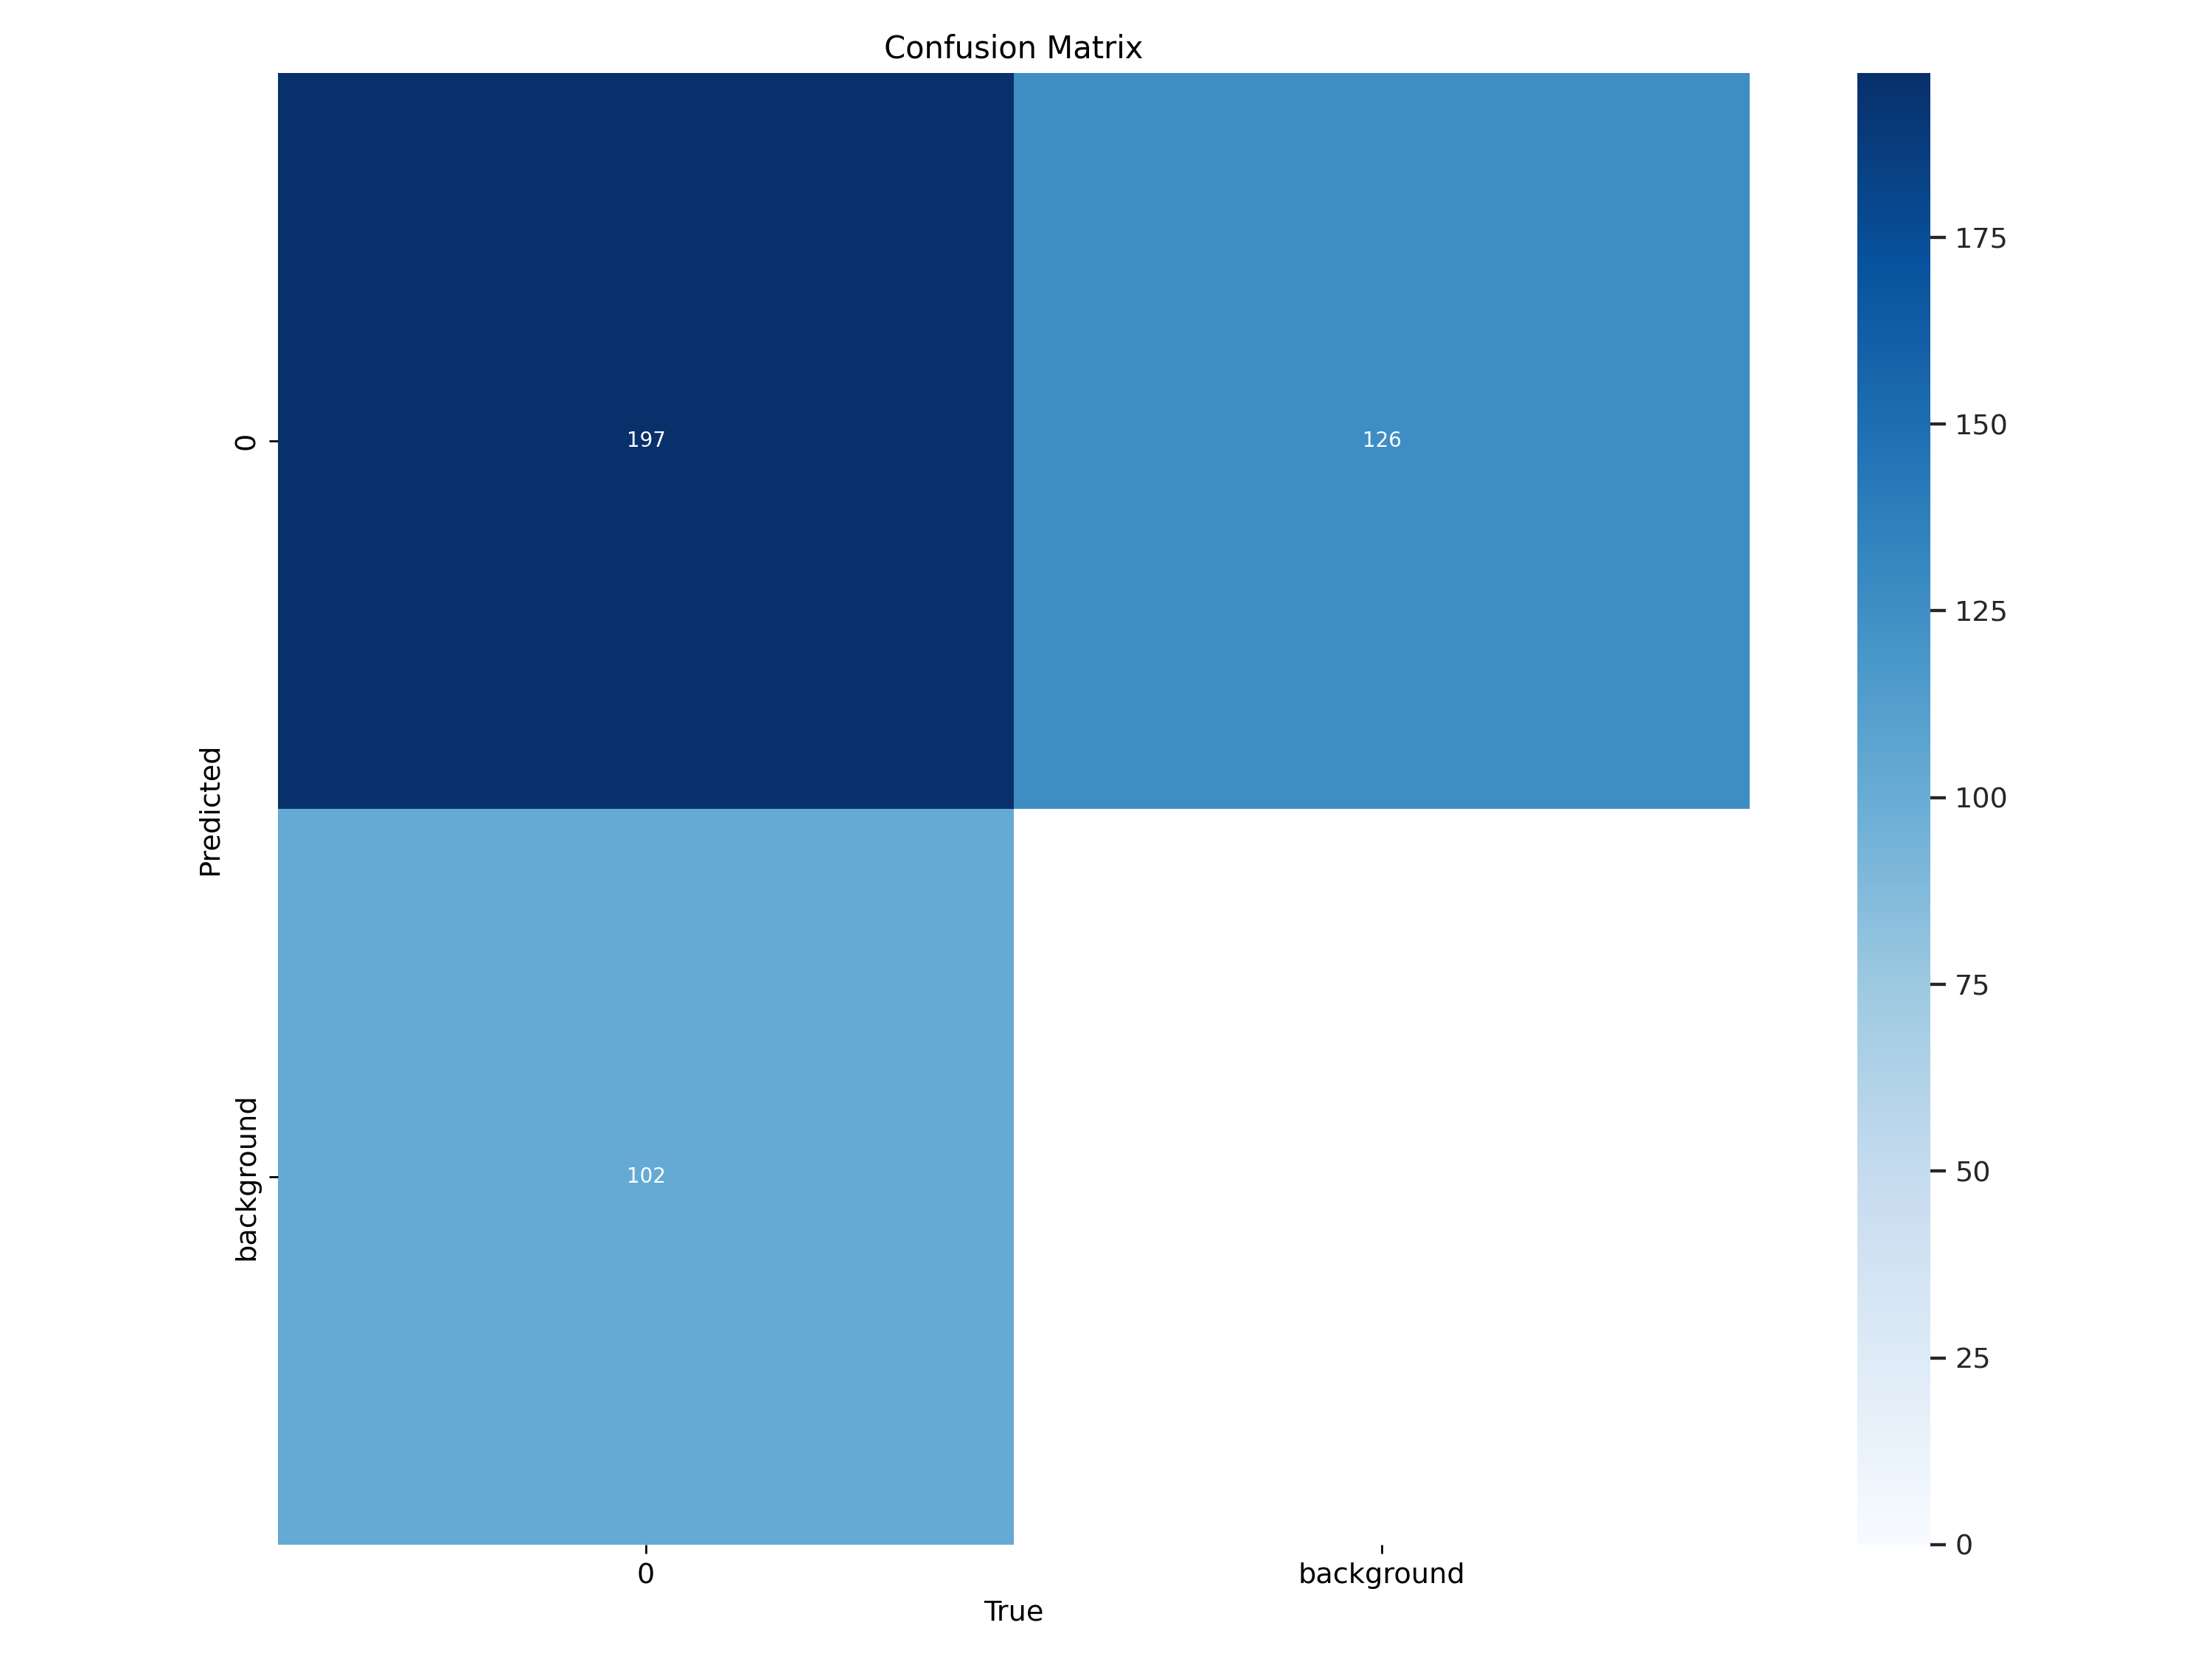

In [14]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png')

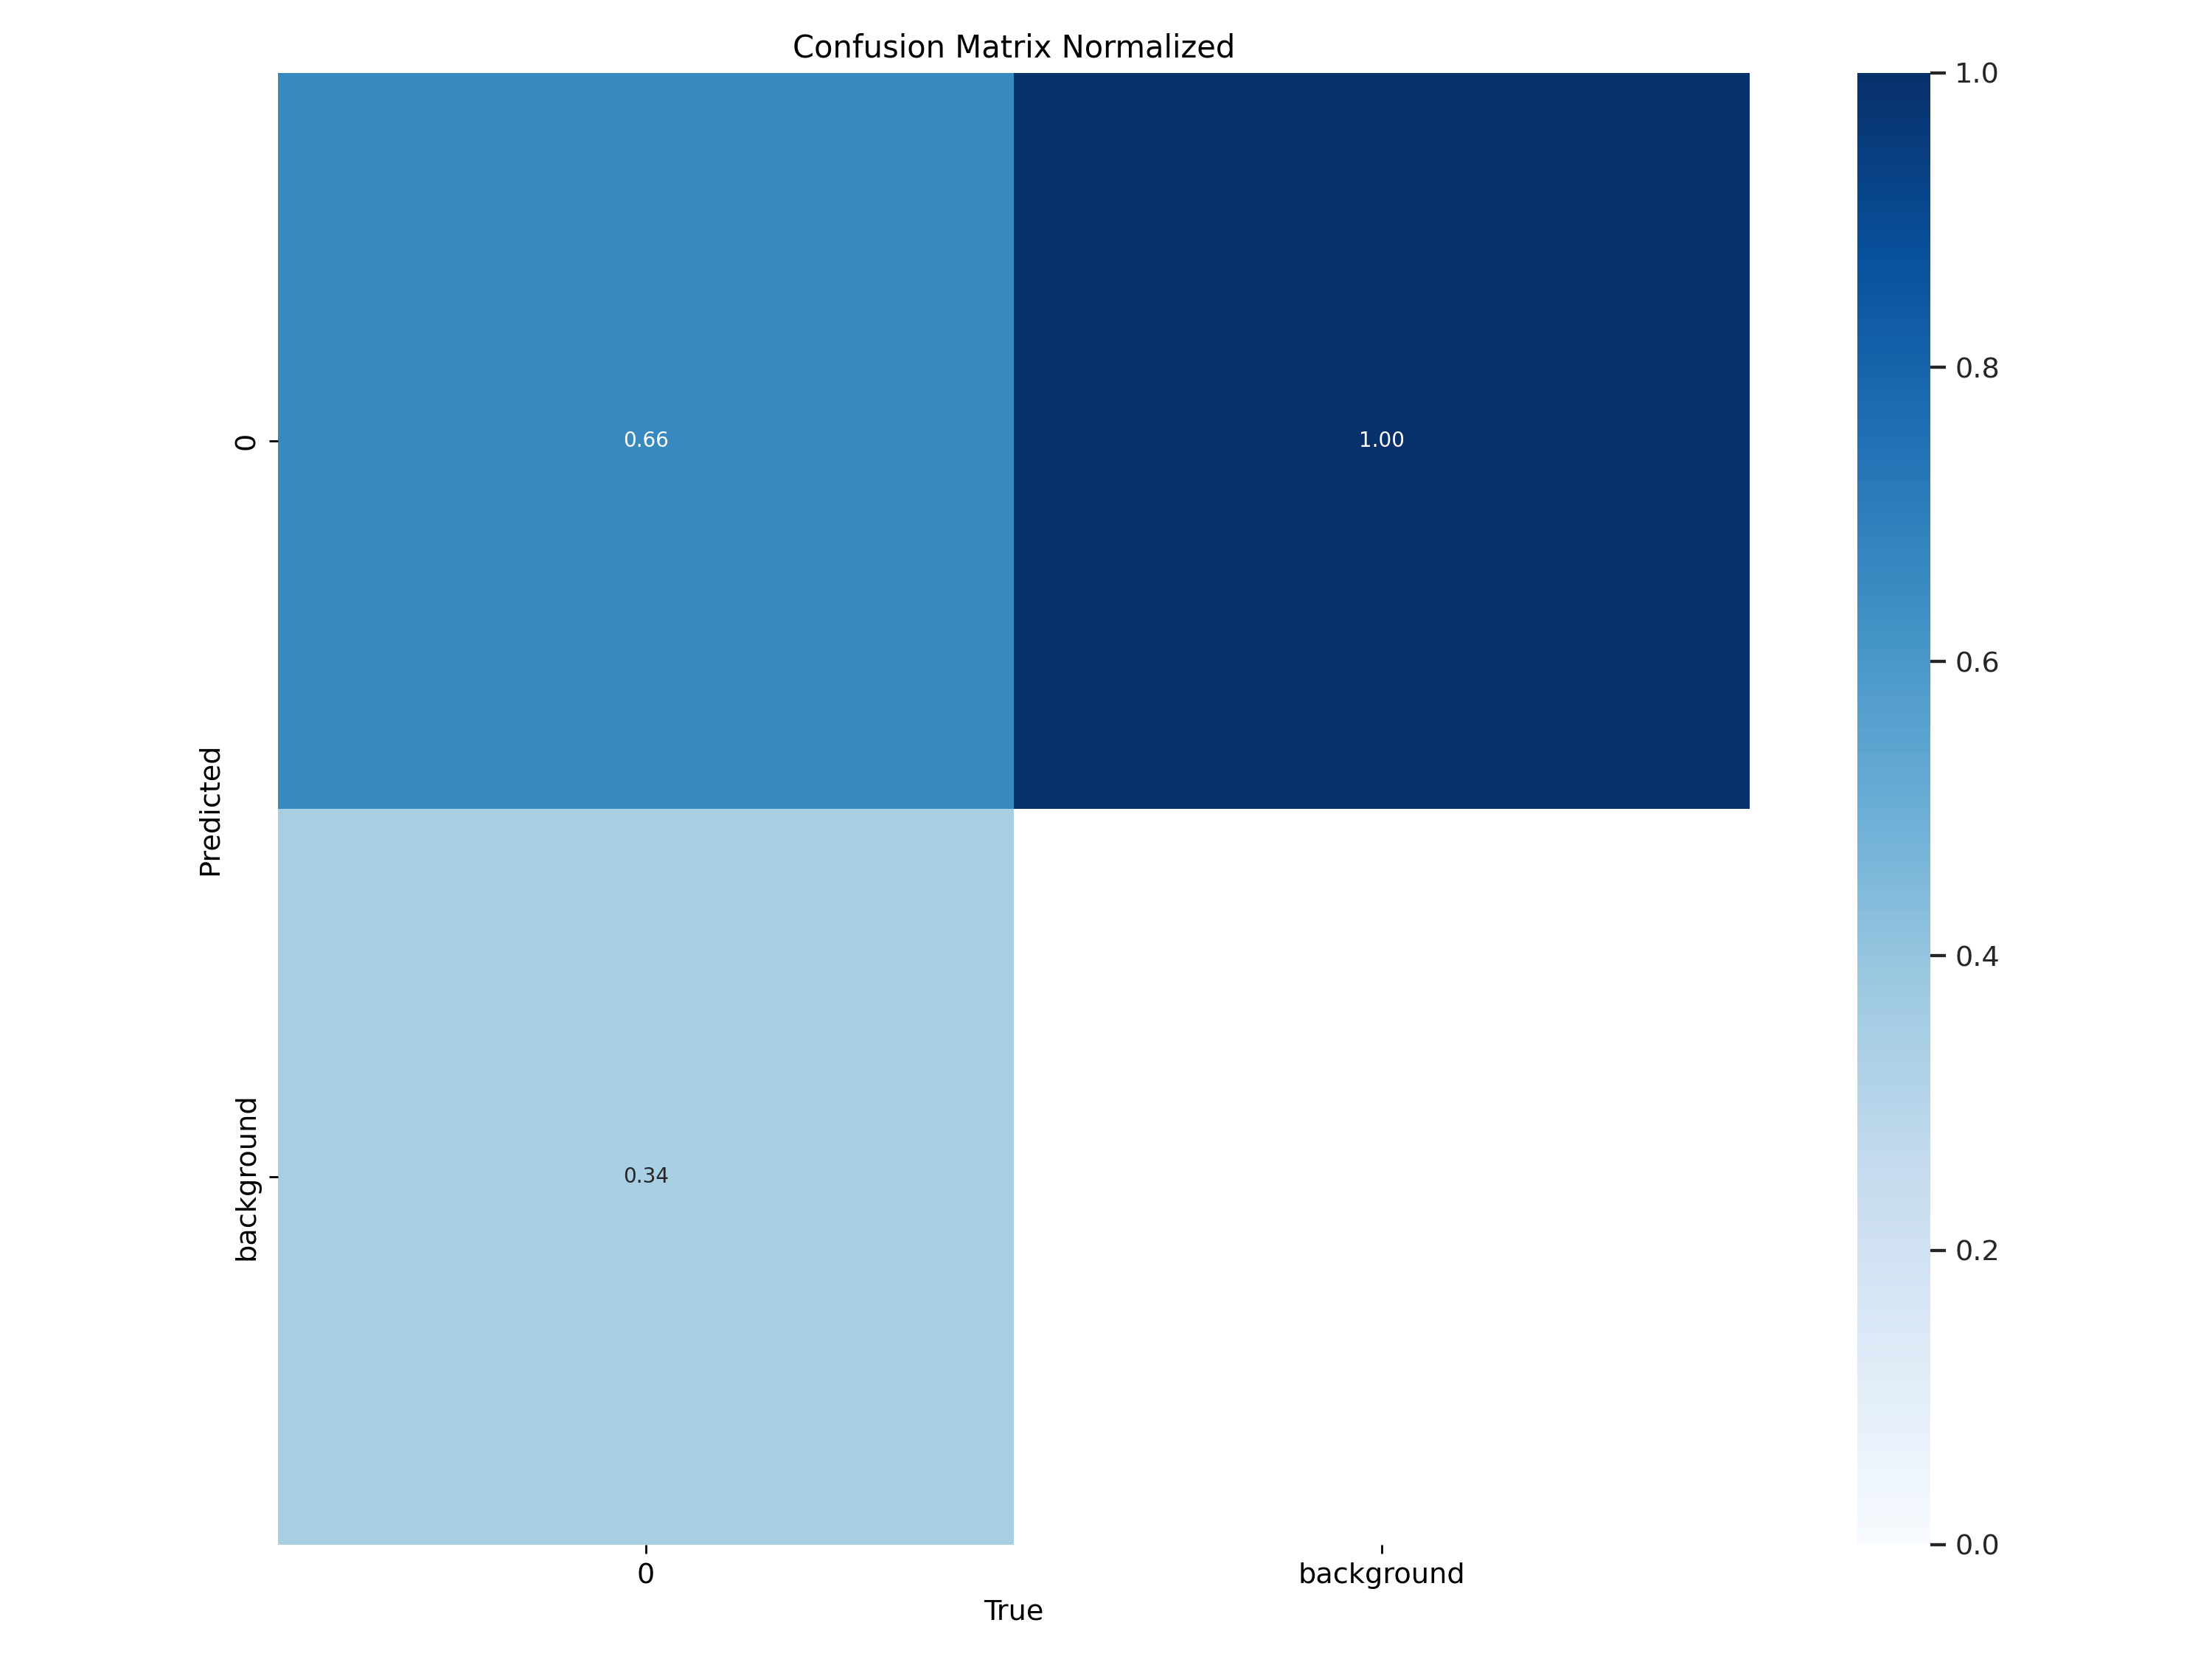

In [15]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix_normalized.png')

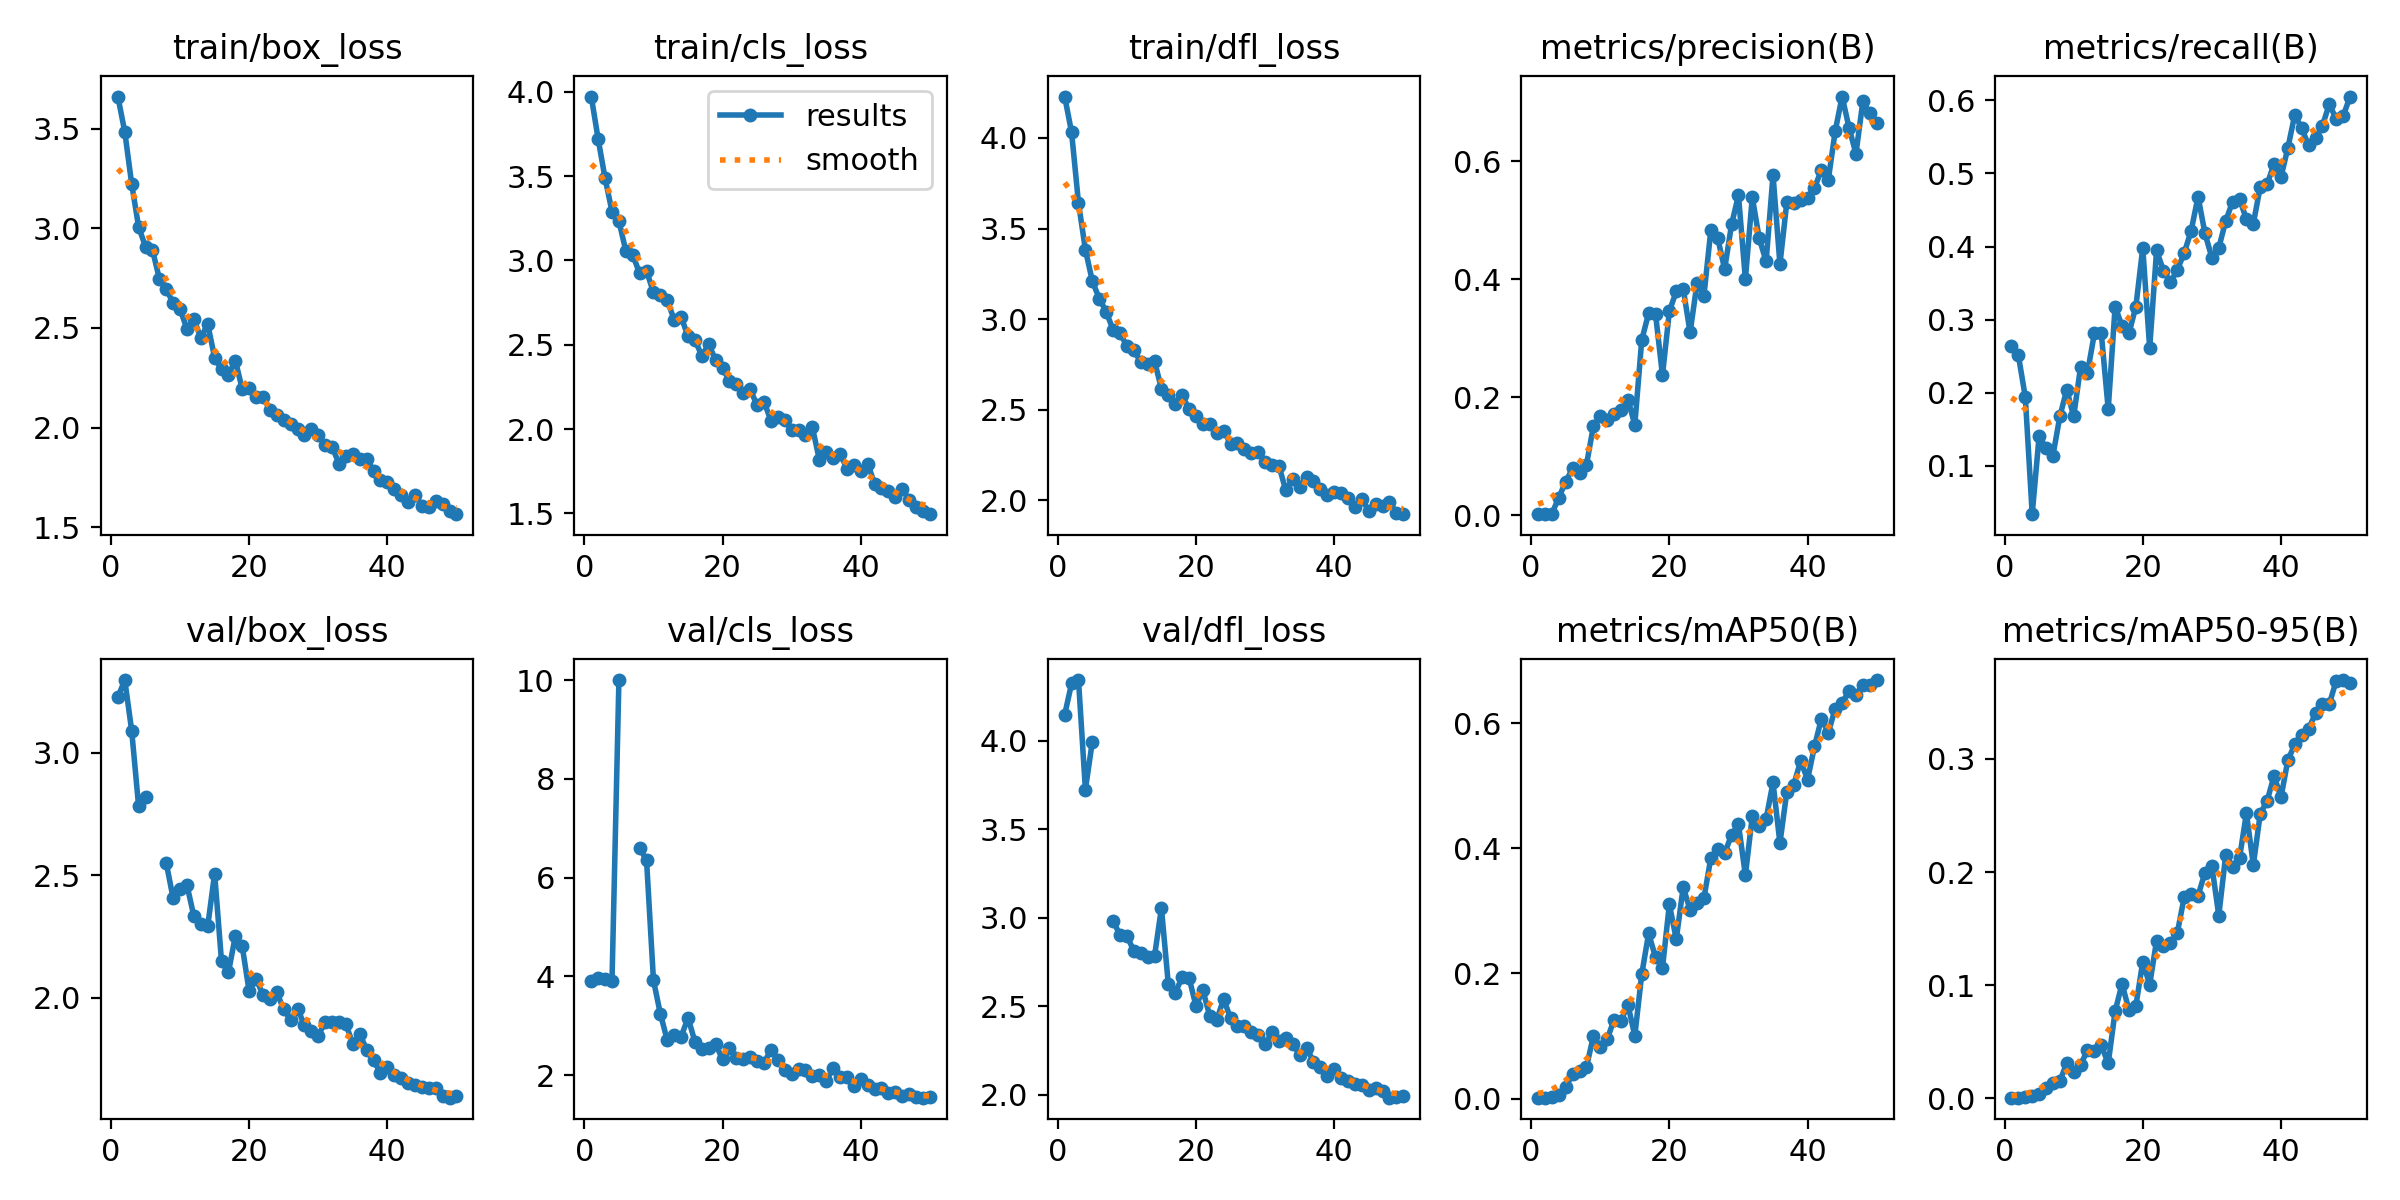

In [16]:
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=1000)

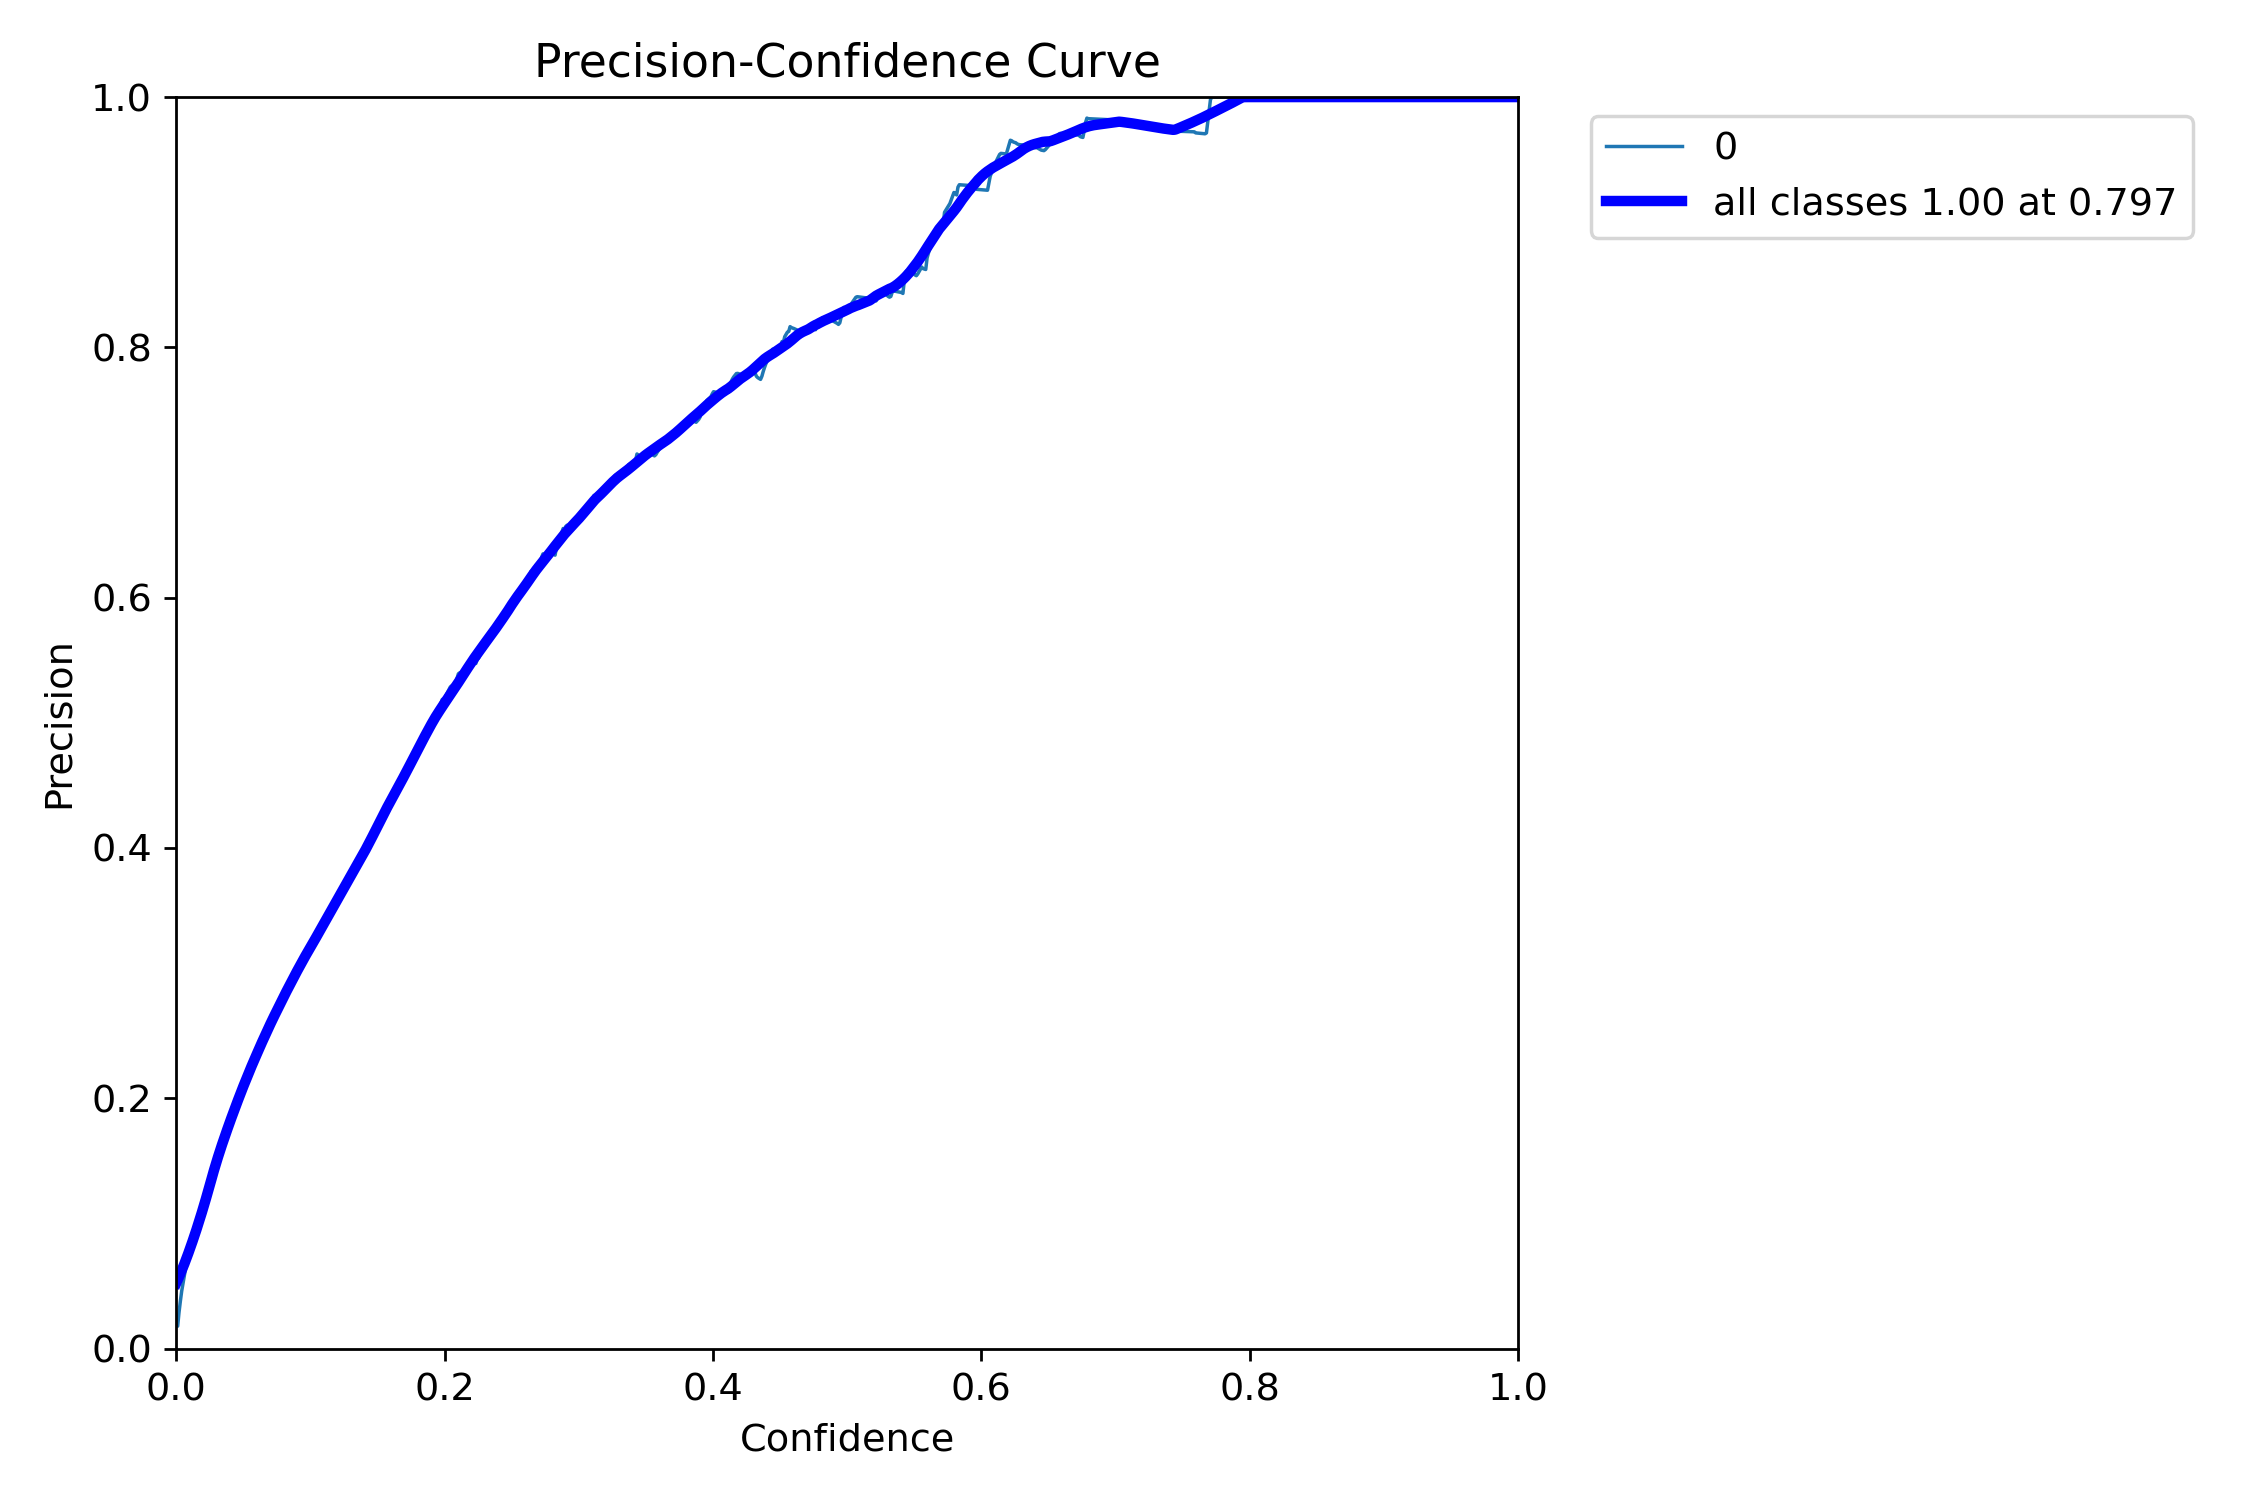

In [17]:
Image(filename=f'{HOME}/runs/detect/train2/P_curve.png')

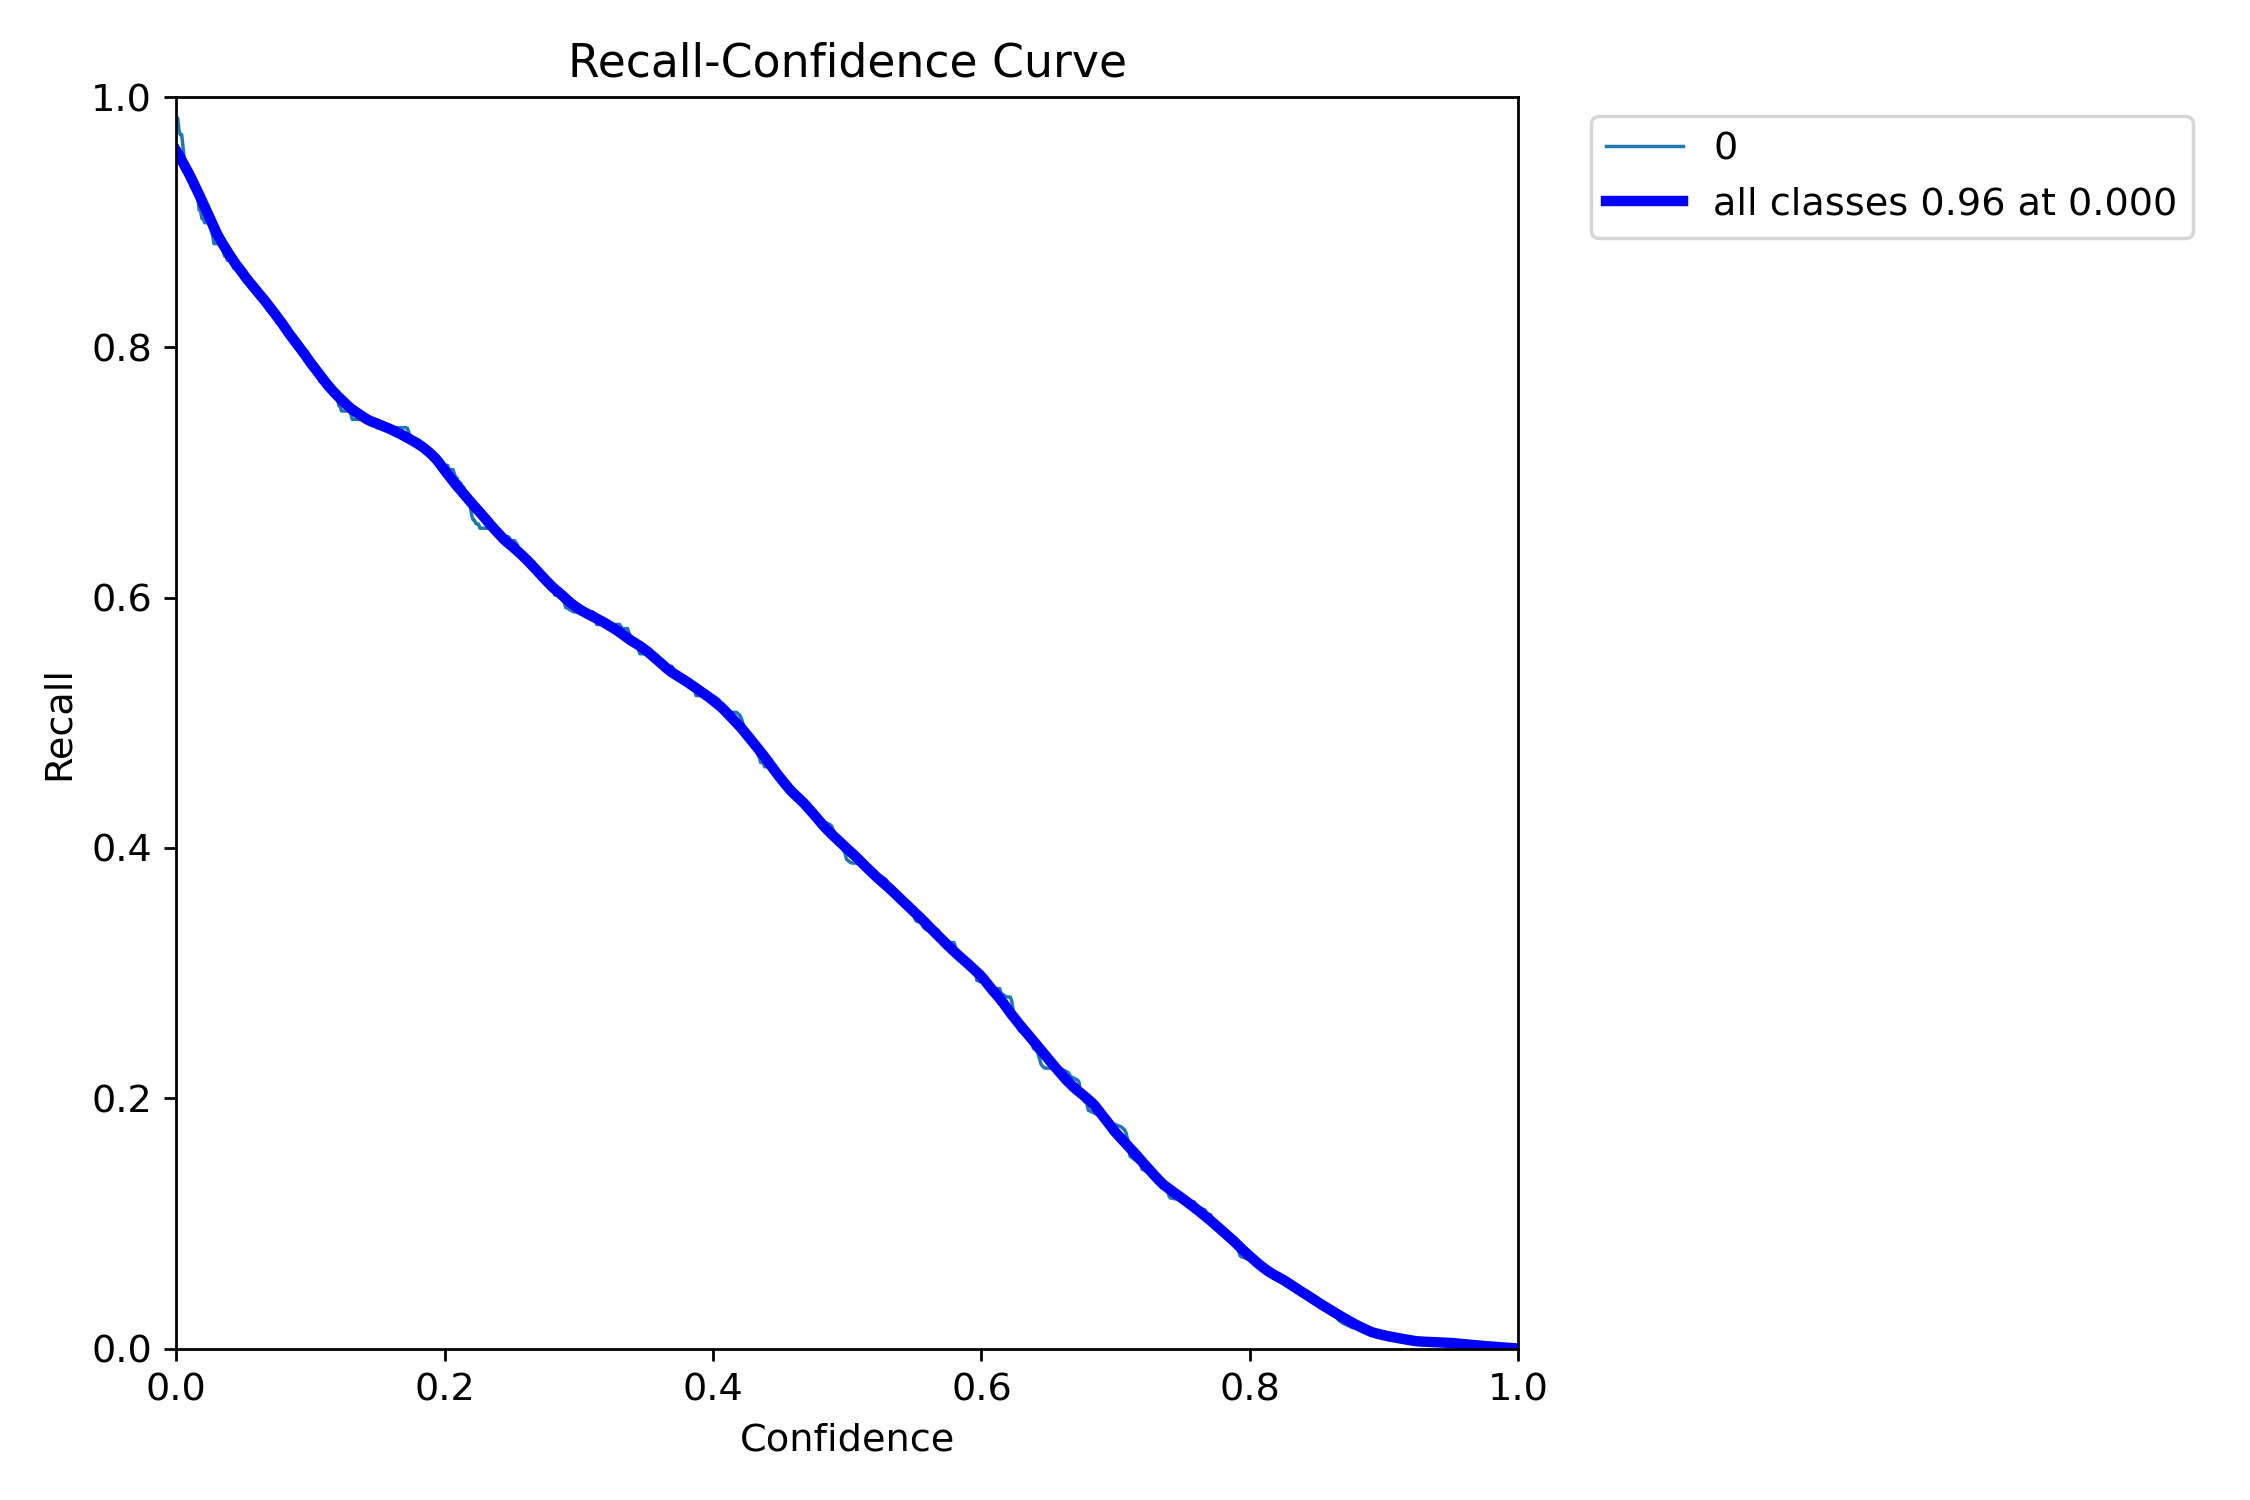

In [18]:
Image(filename=f'{HOME}/runs/detect/train2/R_curve.png')

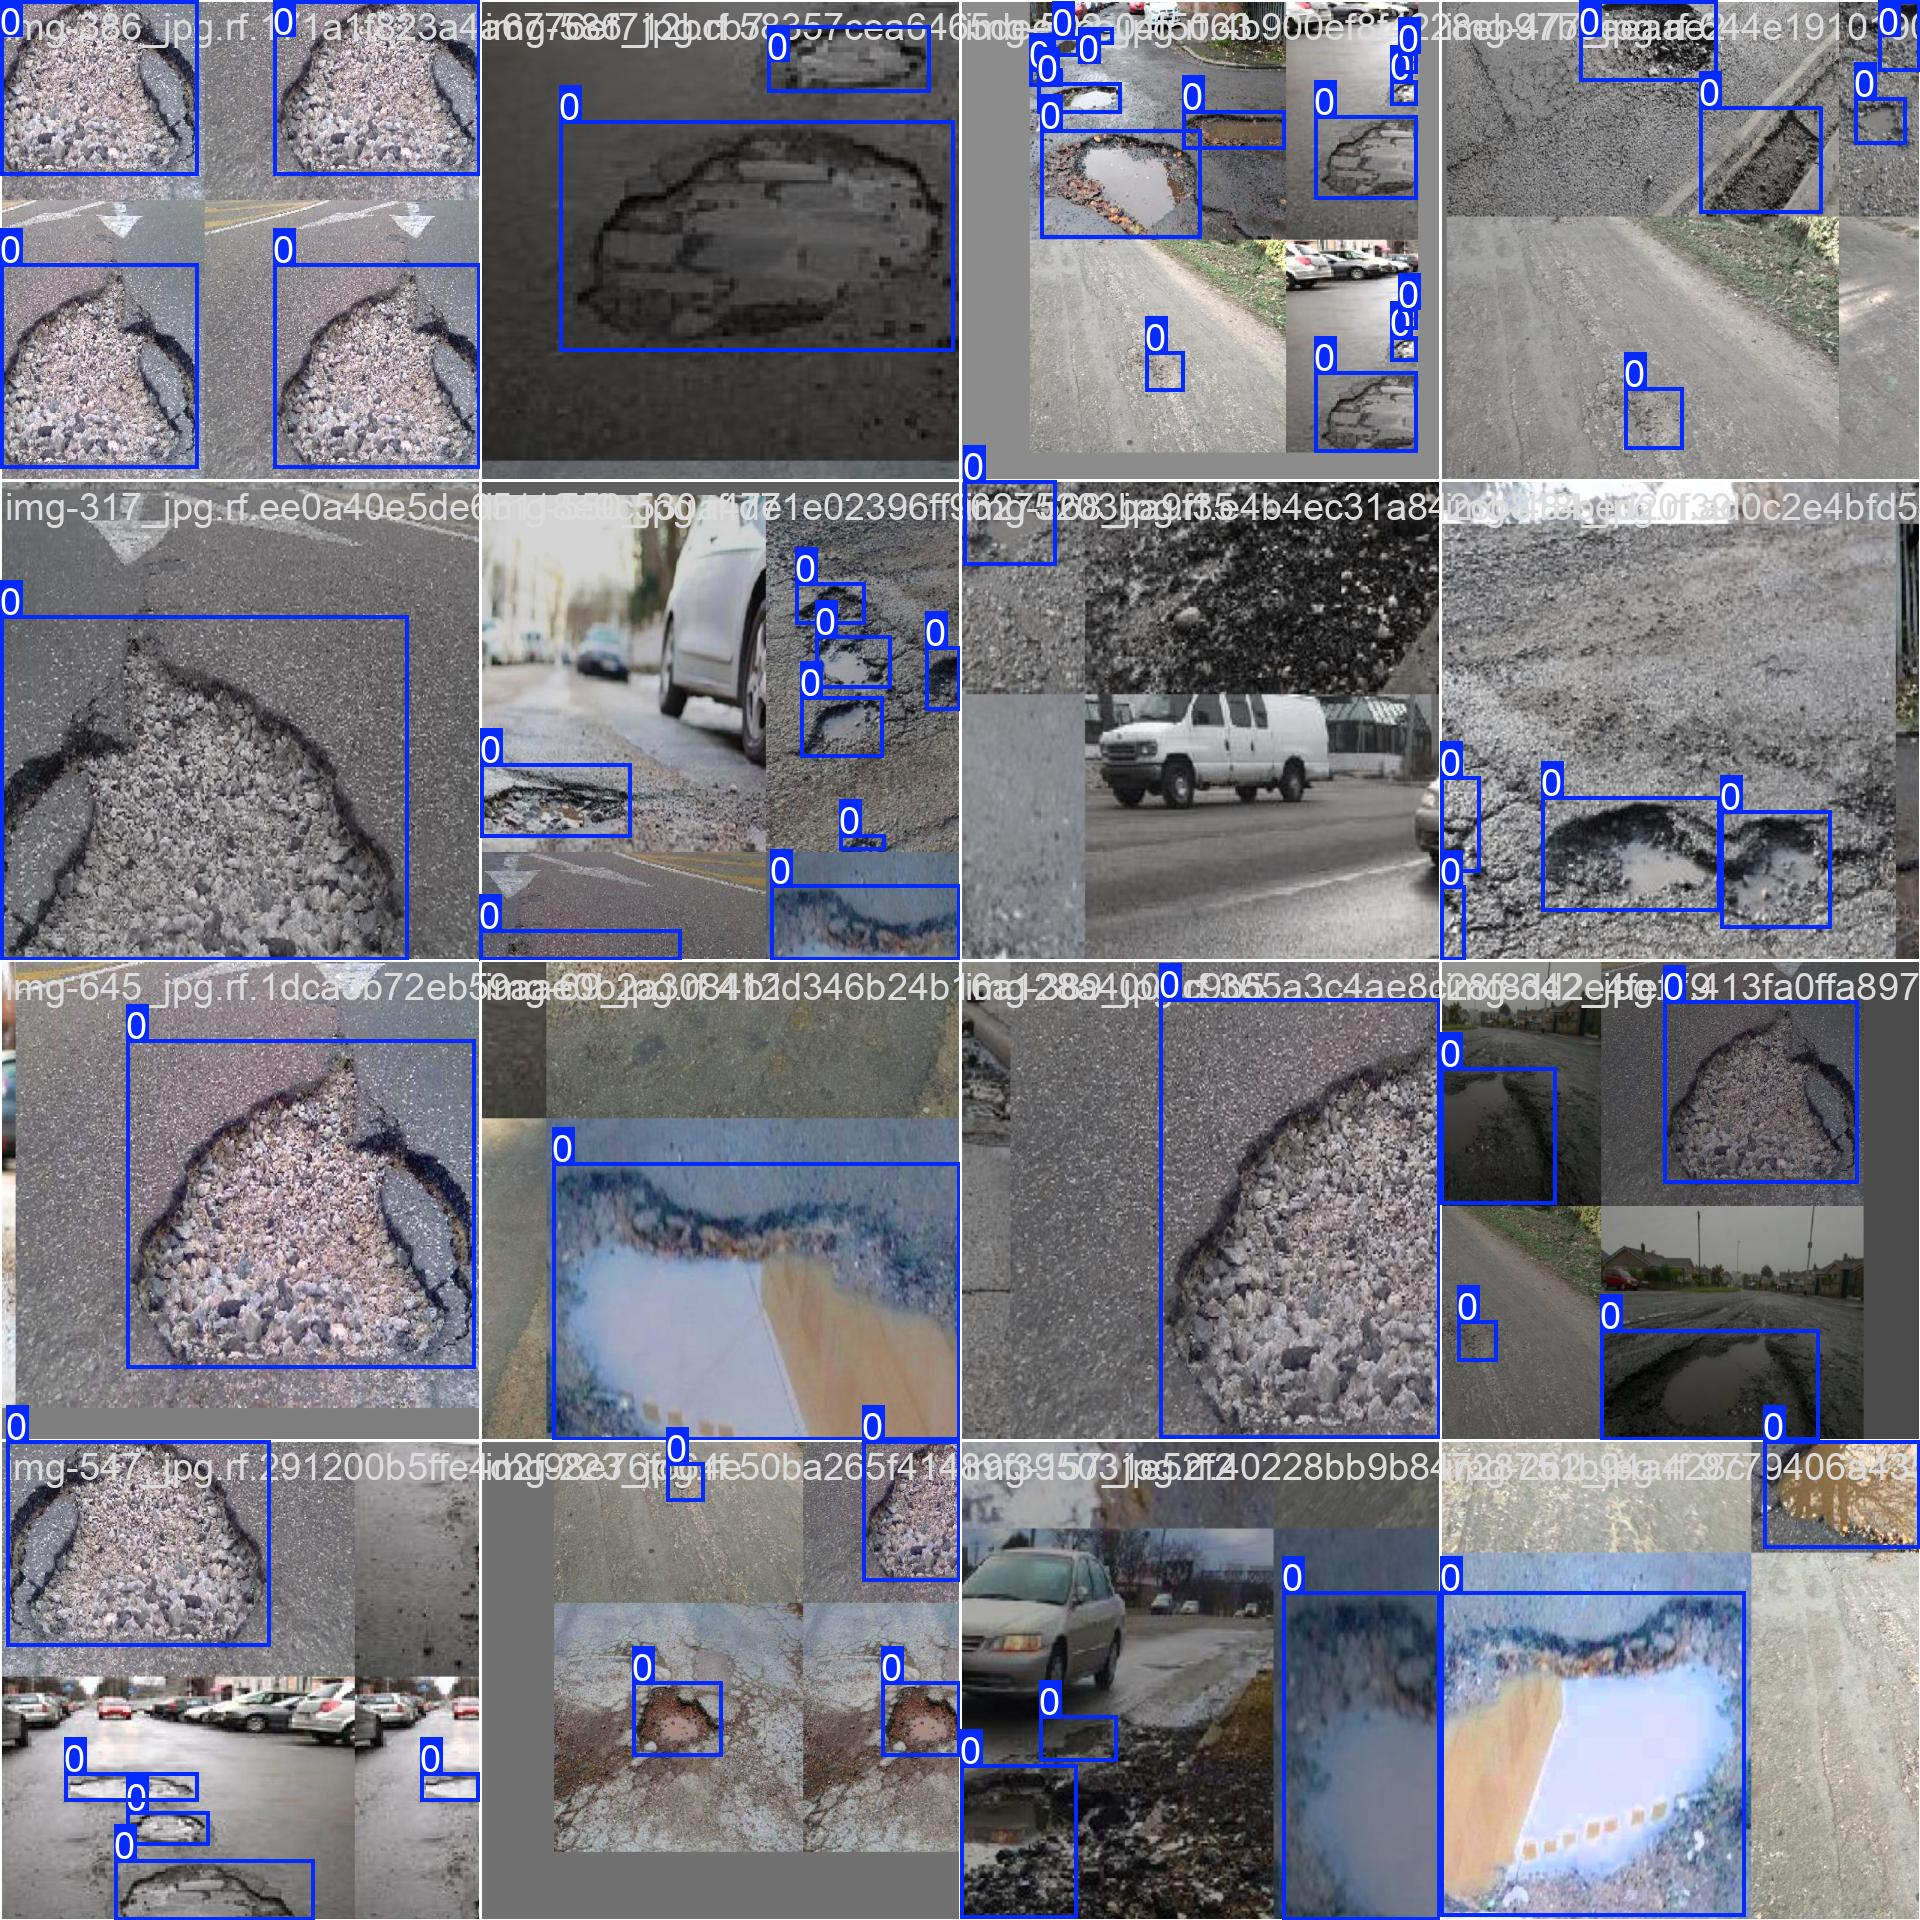

In [19]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch0.jpg')

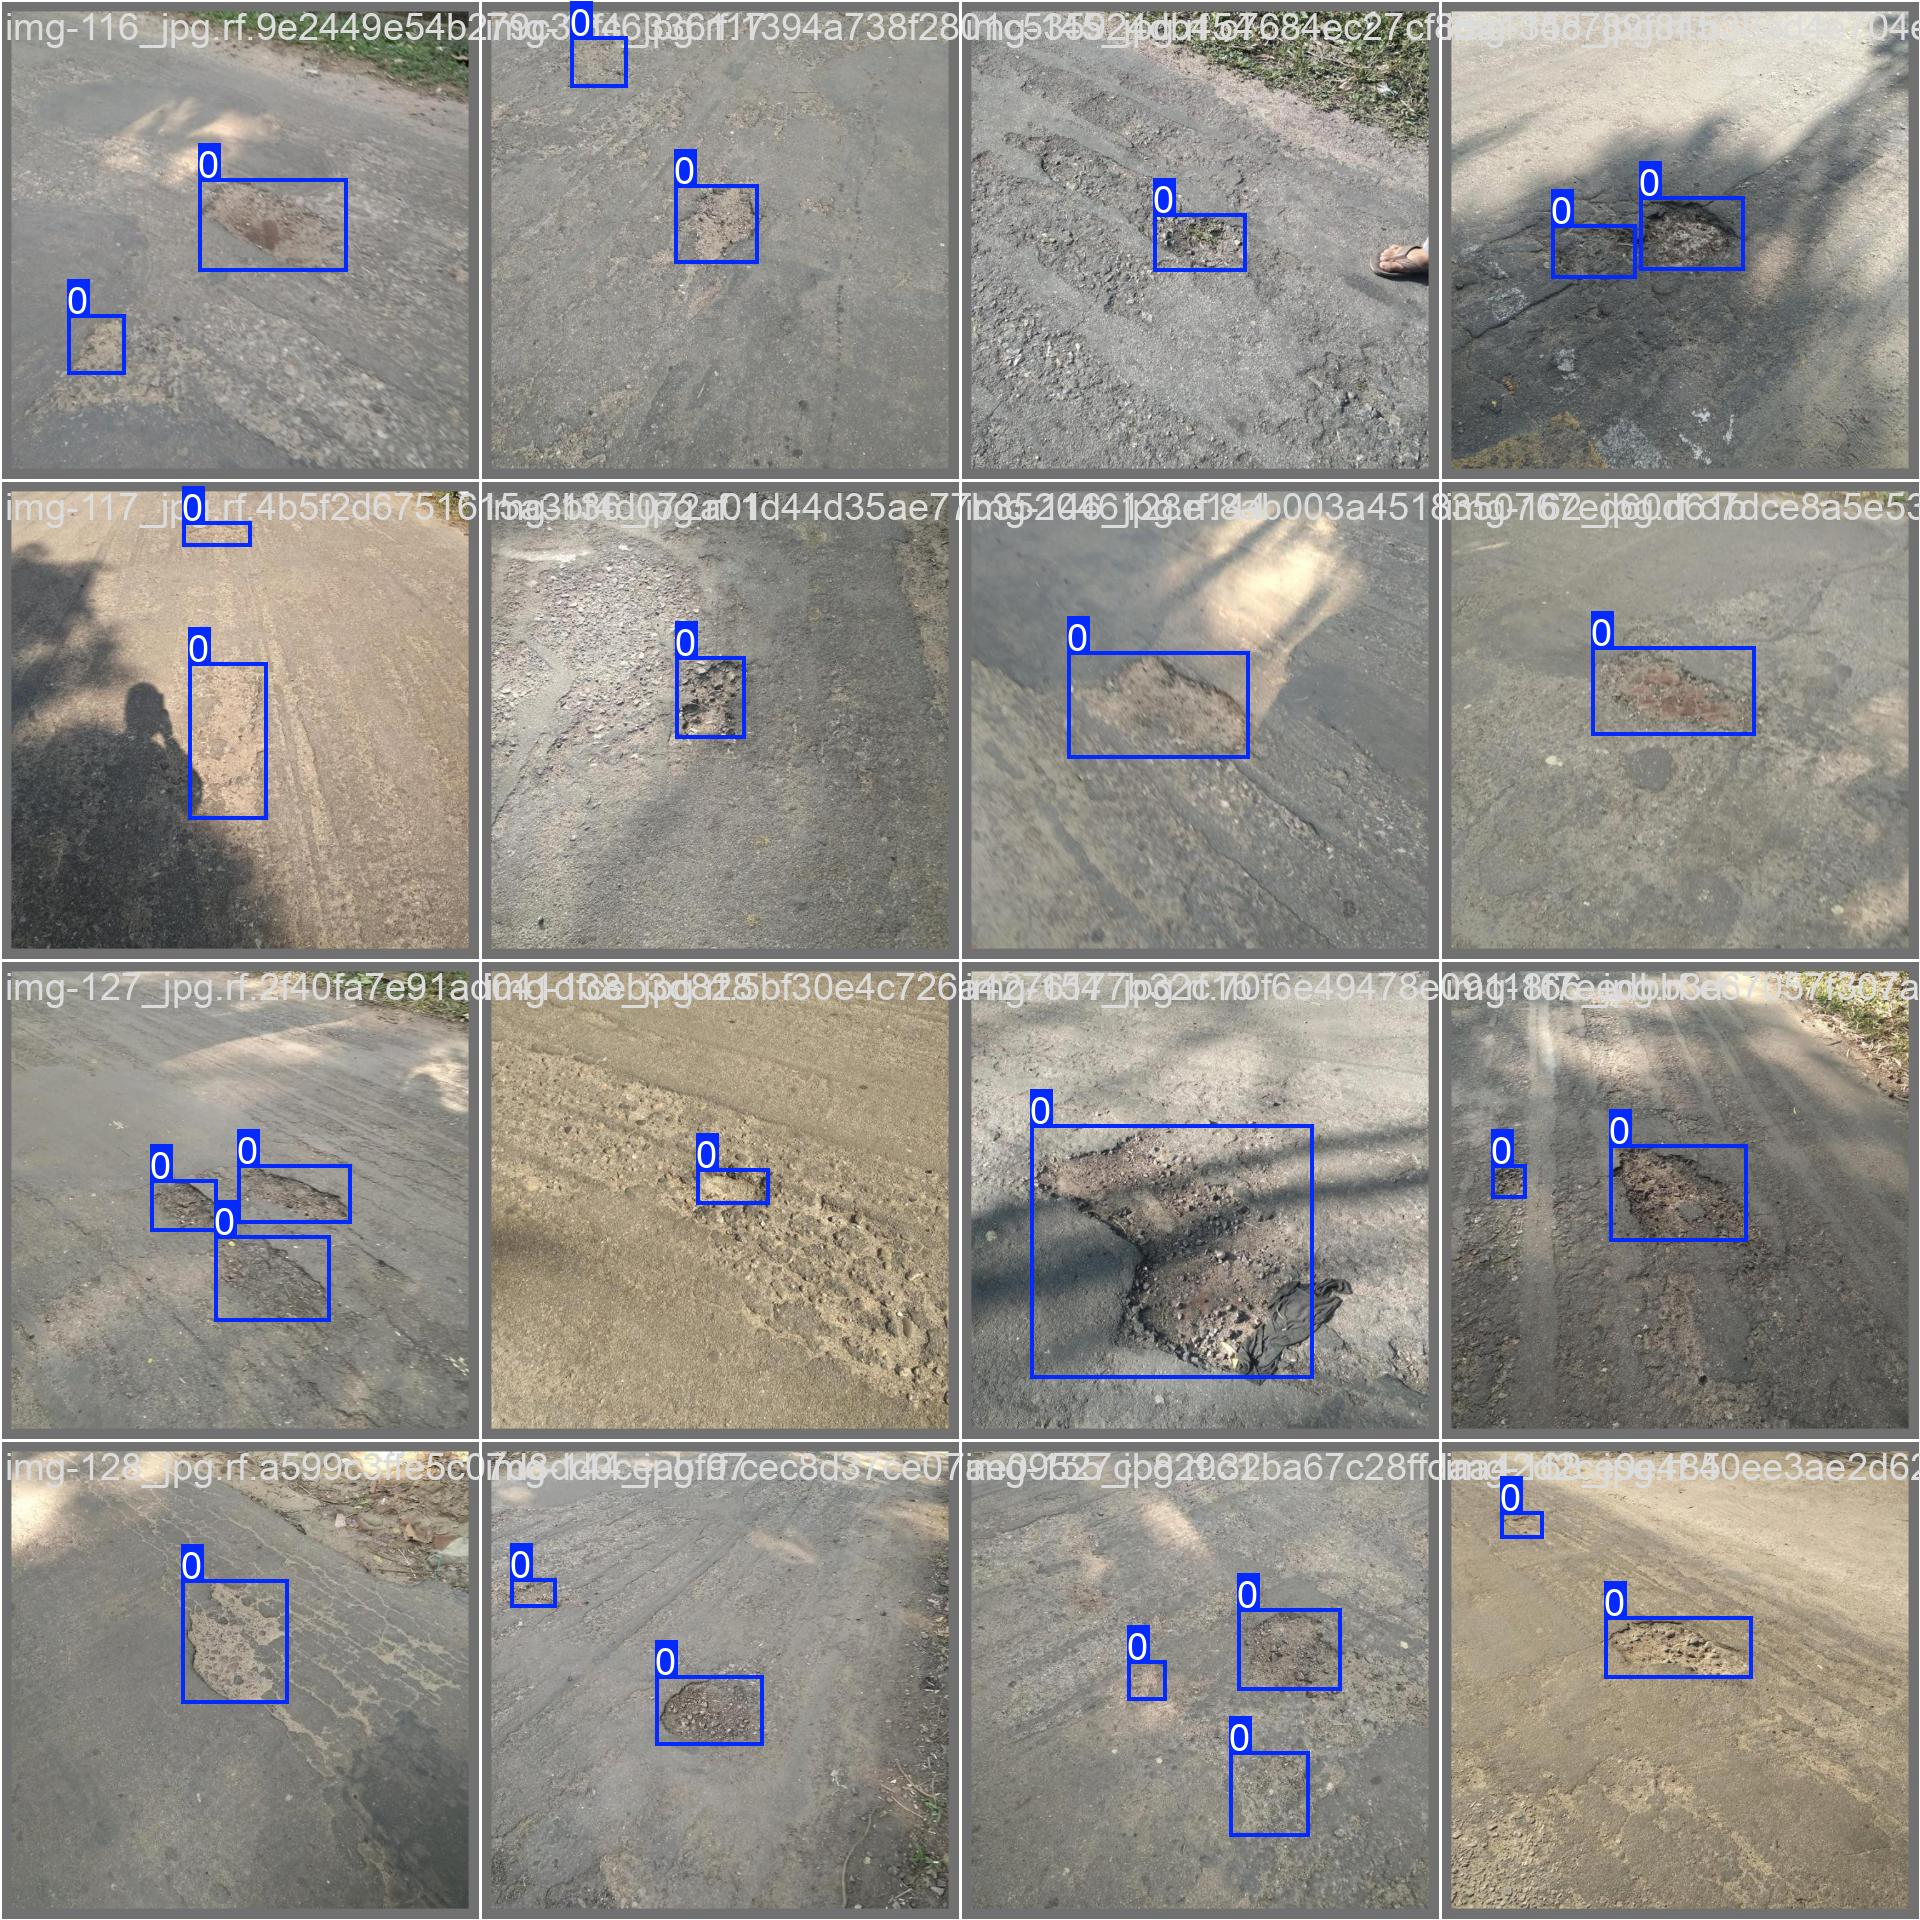

In [20]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_labels.jpg', width=1000)

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
!cp "/content/runs/detect/train2/weights/best.pt" "/content/drive/MyDrive/pothole"

## **Step #06 Download the Model Weights from the Google Drive**

In [24]:
!gdown "1NfzPVzHGBU8agZy_P1px1528lqK3VS7M"

Downloading...
From (original): https://drive.google.com/uc?id=1NfzPVzHGBU8agZy_P1px1528lqK3VS7M
From (redirected): https://drive.google.com/uc?id=1NfzPVzHGBU8agZy_P1px1528lqK3VS7M&confirm=t&uuid=09138c32-35f3-4d5d-a3d0-1b4f2cbc83b8
To: /content/best.pt
100% 39.7M/39.7M [00:00<00:00, 80.4MB/s]


## **Step # 07 Validate Fine-Tuned Model**

In [25]:
model = YOLO("/content/drive/MyDrive/pothole/best.pt")

# Validate the model
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12m summary (fused): 402 layers, 19,577,299 parameters, 0 gradients, 59.5 GFLOPs


val: Scanning /content/Potholes-Detection-1/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.10s/it]


                   all        133        299      0.682      0.582      0.661      0.371
Speed: 0.3ms preprocess, 64.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val


array([    0.37077])

## **Step # 08 Inference with Custom Model on Images**

In [26]:
dataset.location

'/content/Potholes-Detection-1'

In [27]:
results = model.predict(source = f"{dataset.location}/test/images", save=True, iou = 0.1)


image 1/67 /content/Potholes-Detection-1/test/images/img-108_jpg.rf.fb2077bd1f912ba69ff9c156746cc3dc.jpg: 640x640 5 0s, 44.6ms
image 2/67 /content/Potholes-Detection-1/test/images/img-110_jpg.rf.6bb8649f02825991cecc7bd5aeab7c99.jpg: 640x640 1 0, 40.7ms
image 3/67 /content/Potholes-Detection-1/test/images/img-114_jpg.rf.ed5a25d244280c6cb642156adc39327f.jpg: 640x640 2 0s, 40.7ms
image 4/67 /content/Potholes-Detection-1/test/images/img-118_jpg.rf.f1bcde57217480d60871316a53900a71.jpg: 640x640 1 0, 40.4ms
image 5/67 /content/Potholes-Detection-1/test/images/img-119_jpg.rf.af8c3c350b56fd8d5b11dd6bc004ec95.jpg: 640x640 3 0s, 31.4ms
image 6/67 /content/Potholes-Detection-1/test/images/img-122_jpg.rf.6283a7ae2bdca95bf301030830e7b356.jpg: 640x640 1 0, 31.3ms
image 7/67 /content/Potholes-Detection-1/test/images/img-125_jpg.rf.530261e35624dab94482e8ae1df28f5d.jpg: 640x640 1 0, 30.7ms
image 8/67 /content/Potholes-Detection-1/test/images/img-141_jpg.rf.874c12943171fd16de27442ee4c53691.jpg: 640x640 

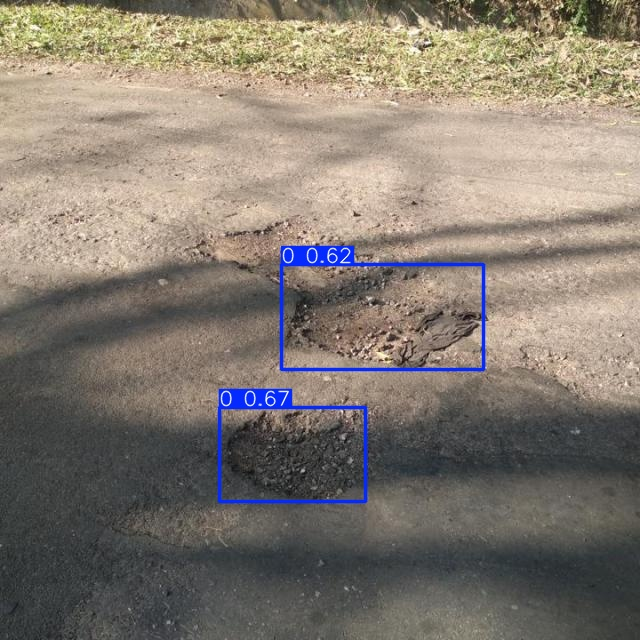

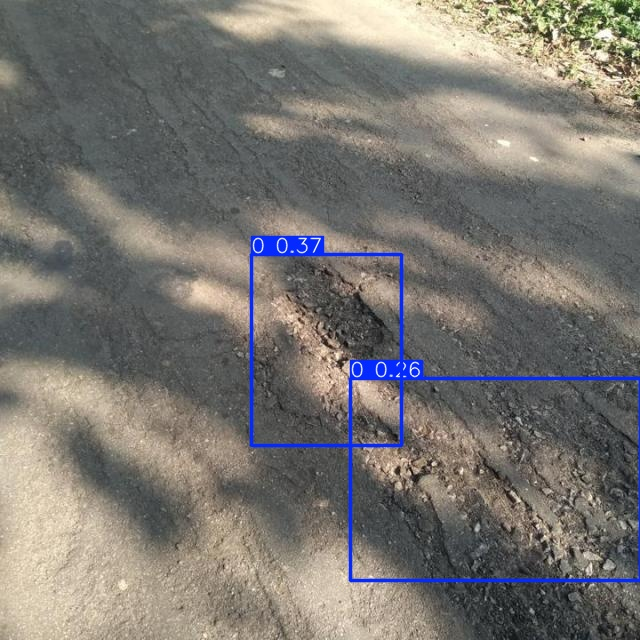

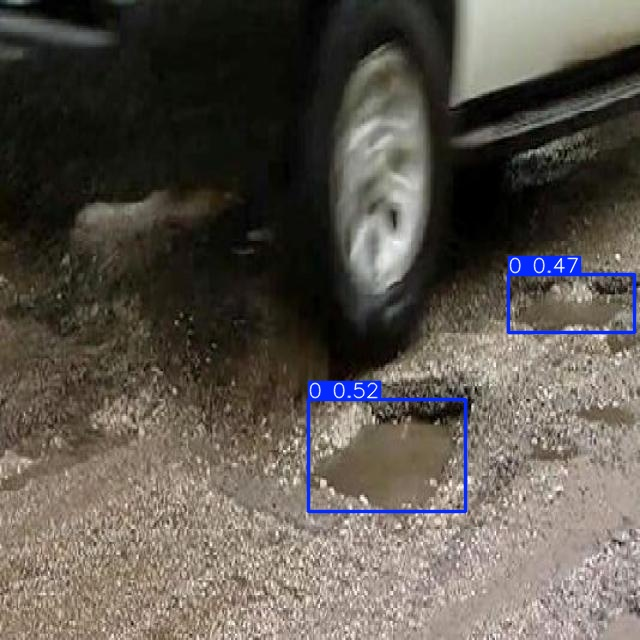

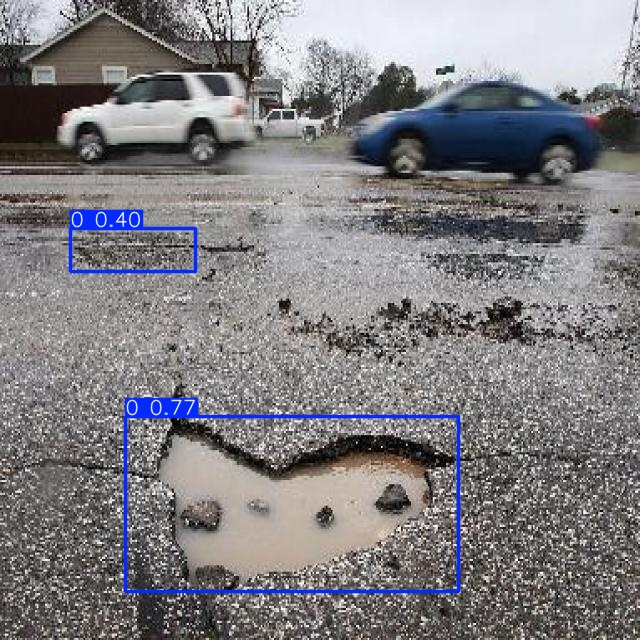

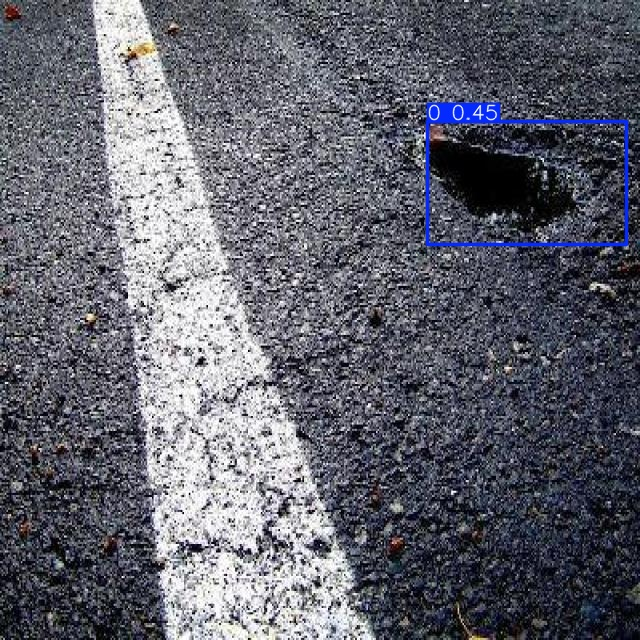

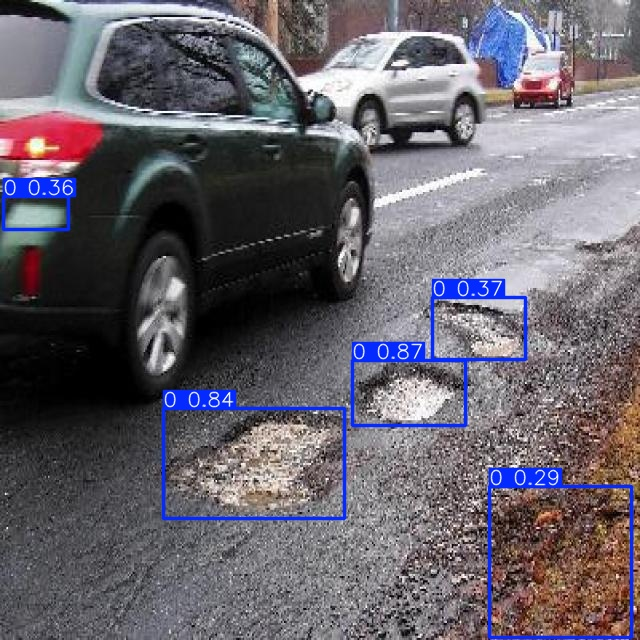

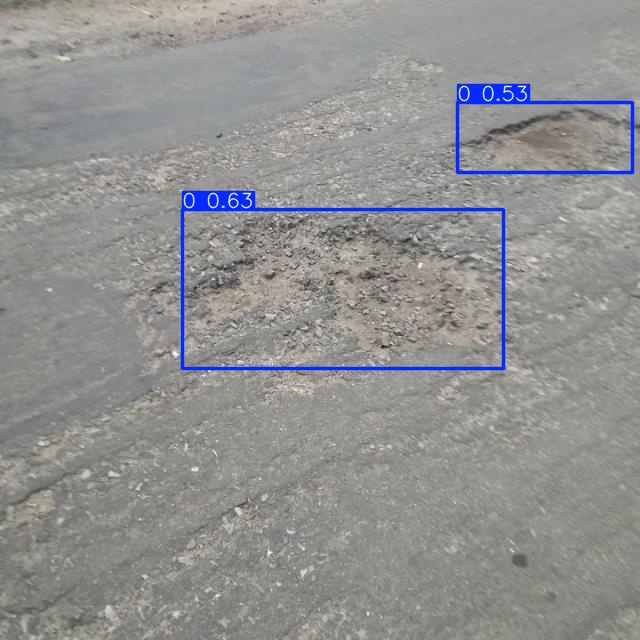

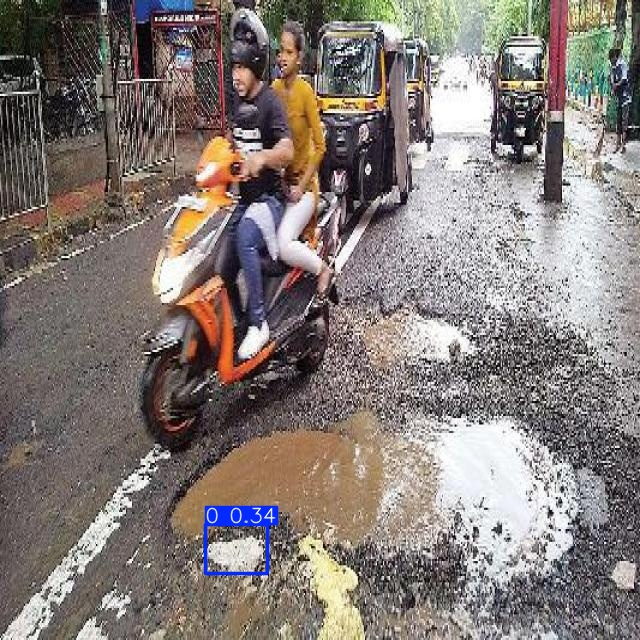

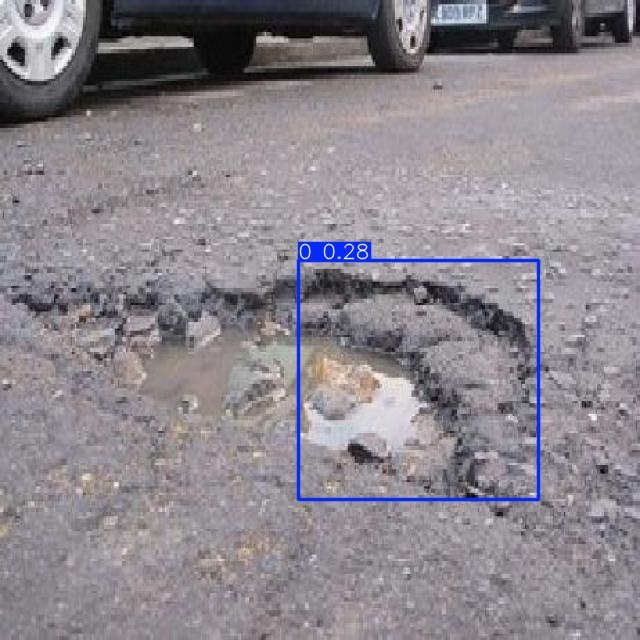

In [28]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## **Step # 09 Inference with Custom Model on Videos**

In [29]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [30]:
!gdown "1NfzPVzHGBU8agZy_P1px1528lqK3VS7M"

Downloading...
From (original): https://drive.google.com/uc?id=1NfzPVzHGBU8agZy_P1px1528lqK3VS7M
From (redirected): https://drive.google.com/uc?id=1NfzPVzHGBU8agZy_P1px1528lqK3VS7M&confirm=t&uuid=ba166b96-1372-4844-afbf-f707001667c5
To: /content/best.pt
100% 39.7M/39.7M [00:00<00:00, 200MB/s]


In [32]:
#results = model.predict(source = f"/{HOME}/demo.mp4", save=True, iou = 0.1)

In [33]:
# from IPython.display import HTML
# from base64 import b64encode
# import os

# # Input video path
# save_path = f'{HOME}/runs/detect/predict4/demo.avi'

# # Compressed video path
# compressed_path = "/content/result_compressed.mp4"

# os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# # Show video
# mp4 = open(compressed_path,'rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""
# <video width=400 controls>
#       <source src="%s" type="video/mp4">
# </video>
# """ % data_url)